In [52]:
# Avoiding warning
import warnings
def warn(*args, **kwargs): pass
warnings.warn = warn

In [53]:
# Librarires
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import nltk
# from nltk.corpus import stopwords
stopwords = ["অবশ্য","অনেক","অনেকে","অনেকেই","অন্তত","অথবা","অথচ","অর্থাত","অন্য","আজ","আছে","আপনার","আপনি","আবার","আমরা","আমাকে","আমাদের"
             ,"আমার","আমি","আরও","আর","আগে","আগেই","আই","অতএব","আগামী","অবধি","অনুযায়ী","আদ্যভাগে","এই","একই","একে","একটি","এখন","এখনও"
             ,"এখানে","এখানেই","এটি","এটা","এটাই","এতটাই","এবং","একবার","এবার","এদের","এঁদের","এমন","এমনকী","এল","এর","এরা","এঁরা","এস","এত"
             ,"এতে","এসে","একে","এ","ঐ"," ই","ইহা","ইত্যাদি","উনি","উপর","উপরে","উচিত","ও","ওই","ওর","ওরা","ওঁর","ওঁরা","ওকে","ওদের","ওঁদের",
             "ওখানে","কত","কবে","করতে","কয়েক","কয়েকটি","করবে","করলেন","করার","কারও","করা","করি","করিয়ে","করার","করাই","করলে","করলেন",
             "করিতে","করিয়া","করেছিলেন","করছে","করছেন","করেছেন","করেছে","করেন","করবেন","করায়","করে","করেই","কাছ","কাছে","কাজে","কারণ","কিছু",
             "কিছুই","কিন্তু","কিংবা","কি","কী","কেউ","কেউই","কাউকে","কেন","কে","কোনও","কোনো","কোন","কখনও","ক্ষেত্রে","খুব	গুলি","গিয়ে","গিয়েছে",
             "গেছে","গেল","গেলে","গোটা","চলে","ছাড়া","ছাড়াও","ছিলেন","ছিল",'ছিলো',"জন্য","জানা","ঠিক","তিনি","তিনঐ","তিনিও","তখন","তবে","তবু","তাঁদের",
             "তাঁাহারা","তাঁরা","তাঁর","তাঁকে","তাই","তেমন","তাকে","তাহা","তাহাতে","তাহার","তাদের","তারপর","তারা","তারৈ","তার","তাহলে","তিনি","তা",
             "তাও","তাতে","তো","তত","তুমি","তোমার","তথা","থাকে","থাকা","থাকায়","থেকে","থেকেও","থাকবে","থাকেন","থাকবেন","থেকেই","দিকে","দিতে",
             "দিয়ে","দিয়েছে","দিয়েছেন","দিলেন","দু","দুটি","দুটো","দেয়","দেওয়া","দেওয়ার","দেখা","দেখে","দেখতে","দ্বারা","ধরে","ধরা","নয়","নানা","না",
             "নাকি","নাগাদ","নিতে","নিজে","নিজেই","নিজের","নিজেদের","নিয়ে","নেওয়া","নেওয়ার","নেই","নাই","পক্ষে","পর্যন্ত","পাওয়া","পারেন","পারি","পারে",
             "পরে","পরেই","পরেও","পর","পেয়ে","প্রতি","প্রভৃতি","প্রায়","ফের","ফলে","ফিরে","ব্যবহার","বলতে","বললেন","বলেছেন","বলল","বলা","বলেন","বলে",
             "বহু","বসে","বার","বা","বিনা","বরং","বদলে","বাদে","বার","বিশেষ","বিভিন্ন	বিষয়টি","ব্যবহার","ব্যাপারে","ভাবে","ভাবেই","মধ্যে","মধ্যেই","মধ্যেও",
             "মধ্যভাগে","মাধ্যমে","মাত্র","মতো","মতোই","মোটেই","যখন","যদি","যদিও","যাবে","যায়","যাকে","যাওয়া","যাওয়ার","যত","যতটা","যা","যার","যারা",
             "যাঁর","যাঁরা","যাদের","যান","যাচ্ছে","যেতে","যাতে","যেন","যেমন","যেখানে","যিনি","যে","রেখে","রাখা","রয়েছে","রকম","শুধু","সঙ্গে","সঙ্গেও",
             "সমস্ত","সব","সবার","সহ","সুতরাং","সহিত","সেই","সেটা","সেটি","সেটাই","সেটাও","সম্প্রতি","সেখান","সেখানে","সে","স্পষ্ট","স্বয়ং","হইতে","হইবে",
             "হৈলে","হইয়া","হচ্ছে","হত","হতে","হতেই","হবে","হবেন","হয়েছিল","হয়েছে","হয়েছেন","হয়ে","হয়নি","হয়","হয়েই","হয়তো","হল","হলে","হলেই","হলেও",
             "হলো","হিসাবে","হওয়া","হওয়ার","হওয়ায়","হন","হোক","জন","জনকে","জনের","জানতে","জানায়","জানিয়ে","জানানো","জানিয়েছে","জন্য","জন্যওজে",
             "জে","বেশ","দেন","তুলে","ছিলেন","চান","চায়","চেয়ে","মোট","যথেষ্ট","টি"]
# stopwords = stopwords.words('english')
# stopwords.remove('not')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import scipy
from scipy import sparse

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics  import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [54]:
# Function for removing special characters from a sentence/review/data
special_characters = string.punctuation + ',?!।‘’'
numeric_characters = '0123456789০১২৩৪৫৬৭৮৯'
def remove_special_characters(sentence):
    updated_sentence = "".join([char for char in sentence if char not in special_characters])
    updated_sentence = "".join([char for char in updated_sentence if char not in numeric_characters])
    return updated_sentence

# Function for tokenizing the sentence 
def tokenize(sentence):
    tokens = sentence.split(" ")
    return tokens

# Function for removing stopwords
def remove_stopwords(tokenized_list):
    updated_tokenized_list = [word for word in tokenized_list if word not in stopwords]
    new_word_list = []
    newline_status = 0
    special_character_status = 0
    for word in updated_tokenized_list:
        if "\n" in word:
            word = re.sub('\n', ' ', word)
            if "\xa0" in word:
                word = re.sub('\xa0', ' ', word)
            if ' ' in word:
                collection = word.split(" ")
                for c in collection:
                    newline_status = 1
                    new_word_list.append(c)
                 
        if "\xa0" in word:
            word = re.sub('\xa0', ' ', word)
            if "\n" in word:
                word = re.sub('\xa0', ' ', word)
            if ' ' in word:
                collection = word.split(" ")
                for c in collection:
                    special_character_status = 1
                    new_word_list.append(c)
                
        if newline_status == 1:
            pass
        elif special_character_status == 1:
            pass
        else:
            new_word_list.append(word)    
    return list(set(new_word_list))

# Function for lemmatizing (Keeps the sentence's context)
def lemmatizing(tokenized_list):
    lemmatizing_list = Noun_Stemmer(' '.join(tokenized_list)) ###### change noun or verbal
    return lemmatizing_list

# Function for merging words to create a sentence/review/data
def words_merging(lemmatized_list):
    sentence = ' '.join(str(x) for x in lemmatized_list)
    return sentence

#Function for Noun Stemming
def Noun_Stemmer_Step_1(sentence):
    word_list     = sentence.split(" ")
    new_word_list = []
    independant_inflections_1 = 'তে,কে,রা,দে,কা,রা'.split(",")
    independant_inflections_2 = 'গুলি,গুলো,দের,গুলোতে'.split(",")
    single_inflections_character = 'া,ো,ে,ি,ী'.split(",")
    for word in word_list:
        flag = 0
        for i_inflections_1 in independant_inflections_1:
            if i_inflections_1 in word:
                word = re.sub(i_inflections_1+'$', '', word)
                flag = 1
                break
        
        status = 0
        characters = list(word)
        clean_list = [x for x in characters if x not in single_inflections_character]
        length = len(clean_list)
        if length > 3:
            status = 1
        
        if status == 1:
            for i_inflections_2 in independant_inflections_2:
                if i_inflections_2 in word:
                    word = re.sub(i_inflections_2+'$', '', word)
                    break
                
        new_word_list.append(word)

    return ' '.join(new_word_list)      
    
def Noun_Stemmer_Step_2(sentence):
    word_list     = sentence.split(" ")
    new_word_list = []
    independant_inflections = ['য়ের']
    single_inflections_character = 'া,ো,ে,ি,ী'.split(",")
    vowels = 'অ,আ,ই,ঈ,উ,ঊ,ঋ,এ,ঐ,ও,ঔ'.split(",")
    for word in word_list:
        for i_inflections in independant_inflections:
                if i_inflections in word:
                    temp = re.sub(i_inflections+'$', '', word)
                    characters = list(temp)
                    clean_list = [x for x in characters if x not in single_inflections_character]
                    length = len(clean_list)
                    if length < 2:
                        word = re.sub(i_inflections+'$', '', word)
                        break
                    elif clean_list[-1] in vowels:
                        word = re.sub(i_inflections+'$', '', word)
                        break
                    else:
                        word = word[:-2]
                        break
        for single_inflection in single_inflections_character:
            if  len(word) > 1 and single_inflection in word[-2] and word[-1] == 'র':
                word = word[:-1]
                if word[-1] == 'ে':
                    word = word[:-1]
                    break
                
        new_word_list.append(word)
    
    return ' '.join(new_word_list) 

def Noun_Stemmer_Step_3(sentence):
    word_list     = sentence.split(" ")
    new_word_list = []
    for word in word_list:
        if word != "":
            if word[-1] == 'র':
                index = word.find('ষ')
                if index != -1:
                    if index < len(word) - 2: 
                        if word[index+2]  == 'ট':
                            word = re.sub('র'+'$', '', word)
                        elif 'টির' in word:
                            word = re.sub('টির'+'$', '', word)
            elif 'টি' in word:
                word = re.sub('টি'+'$', '', word)
            elif 'টা' in word:
                word = re.sub('টা'+'$', '', word)
            elif 'টির' in word:
                word = re.sub('টির'+'$', '', word)
            elif 'জন' in word:
                word = re.sub('জন'+'$', '', word)
            elif 'খানা' in word:
                word = re.sub('খানা'+'$', '', word)
            new_word_list.append(word)
    
    return ' '.join(new_word_list)   

def Noun_Stemmer(sentence):
    stemmed_sentence = Noun_Stemmer_Step_1(sentence)
    stemmed_sentence = Noun_Stemmer_Step_2(stemmed_sentence)
    stemmed_sentence = Noun_Stemmer_Step_3(stemmed_sentence)
    return stemmed_sentence.split(" ")

# Function for Bangla Stemming
def Verbal_Stemmer_Step_1(sentence):
    word_list = sentence.split(" ")
    new_word_list = []
    independant_inflections_1 = 'ই,ছ,ত,ব,ল,ন,ক,স,ম'.split(",")
    independant_inflections_2 = 'লা,লো,তো,লে,লে,তা,তি,ছি,ছে,ছো,তে,লি,বে'.split(",")
    combined_inflections = 'ছিলাম,ছিলেন,ছেন,লাম,লেন,তেন,তাম,বেন'.split(",")
    single_inflections_character = 'া,ো,ে,ি,ী'.split(",")
    for word in word_list:
        if word == 'আন':
            word = 'আনা'
            new_word_list.append(word)
        elif word == 'আস':
            word = 'আসা'
            new_word_list.append(word)
        elif word == 'আস':
            word = 'আসা'
            new_word_list.append(word)
        elif word == 'আয়':
            word = 'আসা'
            new_word_list.append(word)
        elif word == 'এলেন':
            word = 'আসা'
            new_word_list.append(word)
        elif word == 'এসেছিলাম':
            word = 'আসা'
            new_word_list.append(word)
        elif word == 'গিয়েছিলাম':
            word = 'যাওয়া'
            new_word_list.append(word)
        elif word == 'খাচ্ছিলাম':
            word = 'খাওয়া'
            new_word_list.append(word)
        else:
            status = 0
            characters = list(word)
            length1 = len(characters)
            clean_list = [x for x in characters if x not in single_inflections_character]
            length2 = len(clean_list)
            if length1 == length2 and length1 < 3:
                status = 1

            if status == 1:
                new_word_list.append(word)
            elif word == 'দে':
                new_word_list.append(word)
            elif word == 'খা':
                new_word_list.append(word)
            elif  word[-1] == 'া':
                new_word_list.append(word)
            else:
                status = 0
                for c_inflections in combined_inflections:
                    if c_inflections in word:
                        status = 1
                        word = re.sub(c_inflections+'$', '', word)
                if status == 0:
                    for i_inflections_1 in independant_inflections_1:
                        if len(list(word)) > 2:
                            if word[-1] == i_inflections_1:
                                word = word[:-1]
                                if word[-1] in single_inflections_character:
                                    for i_inflections_2 in independant_inflections_2:
                                        word_part1 = word[-1]
                                        word_part2 = word[-2]
                                        inflection_list = list(i_inflections_2)
                                        inflection_part1 = inflection_list[1]
                                        inflection_part2 = inflection_list[0]
                                        if (word_part1 == inflection_part1) and (word_part2 == inflection_part2):
                                            word = word[:-2]
                                            break
                            else:
                                if len(list(word)) == 3:
                                    if word[-1] == 'ে':
                                        word = word[:-1]
                                elif word[-1] in single_inflections_character:
                                    for i_inflections_2 in independant_inflections_2:
                                        word_part1 = word[-1]
                                        word_part2 = word[-2]
                                        inflection_list = list(i_inflections_2)
                                        inflection_part1 = inflection_list[1]
                                        inflection_part2 = inflection_list[0]
                                        if (word_part1 == inflection_part1) and (word_part2 == inflection_part2):
                                            word = word[:-2]
                                            break
                new_word_list.append(word)
        
    return ' '.join(new_word_list)
    
def Verbal_Stemmer_Step_2(sentence):
    word_list = sentence.split(" ")
    new_word_list = []
    single_inflections_character = 'া,ো,ে,ি,ী'.split(",")
    for word in word_list:
        status = 0
        characters = list(word)
        length1 = len(characters)
        clean_list = [x for x in characters if x not in single_inflections_character]
        length2 = len(clean_list)
        if length1 == length2 and length1 < 3:
            status = 1
        
        if status == 1:
            new_word_list.append(word)
        elif word == 'দে':
            new_word_list.append(word)
        elif word == 'খা':
            new_word_list.append(word)
        elif  word[-1] == 'া':
            new_word_list.append(word)
        else:        
            length = 0
            characters = list(word)
            clean_list = [x for x in characters if x not in single_inflections_character]
            length = len(clean_list)
            if length < 3:
                if word[-1] == 'য়' or word[-1] == 'ও':
                    word = word[:-1]
                    word += 'ওয়া'
                    new_word_list.append(word)
                elif word == 'বল':
                    word = 'বলা'
                    new_word_list.append(word)
                else:
                    for s_i_inflections in single_inflections_character:
                        if word[-1] == s_i_inflections:
                            word = word[:-1]
                            if word[-1] == 'য়' or word[-1] == 'ও':
                                word = word[:-1]
                                word += 'ওয়া'
                                new_word_list.append(word)
    return ' '.join(new_word_list)

def Verbal_Stemmer_Step_3(sentence):
    word_list = sentence.split(" ")
    new_word_list = []
    single_inflections_character = 'া,ো,ে,ি,ী'.split(",")
    for word in word_list:
        words = list(word)
        if len(words) > 2 and words[1] in single_inflections_character:
            if words[1] == 'ু':
                words[1] = 'ো'
            elif words[1] == 'ি':
                words[1] = 'ে'
            elif words[1] == 'ে':
                words[1] = 'া'
        new_word_list.append(''.join(words))        

    
    return ' '.join(new_word_list)
    
def Verbal_Stemmer(sentence):
    stemmed_sentence = Verbal_Stemmer_Step_1(sentence)
    stemmed_sentence = Verbal_Stemmer_Step_2(stemmed_sentence)
    stemmed_sentence = Verbal_Stemmer_Step_3(stemmed_sentence)
    return stemmed_sentence.split(" ")

In [55]:
dataframe = pd.read_excel("C:/Users/USER/capstone/mugdha.xlsx",dtype='<U13')
df = pd.DataFrame({'Title': dataframe.iloc[0:,0], 'Body': dataframe.iloc[0:,1], 'Label': dataframe.iloc[0:,4]}) 
df.head(20)


,Title,Body,Label
0,চলে গেলেন মীনা কার্টুনের ‘সেই’ রাম মোহন,চলে গেলেন দক্ষিণ এশিয়ার সবচেয়ে জনপ্রিয় কার্টুন...,1
1,সম্রাটকে গ্রেপ্তারে যুবলীগে কেউ ক্ষুব্ধ কেউ উ...,দাপুটে নেতা ইসমাইল চৌধুরী সম্রাট গ্রেপ্তার হওয়...,1
2,রানু মণ্ডল মারা গেছেন!,লতা মঙ্গেশকরের ‘প্যায়ার কা নগমা’ গান গেয়ে ভাইর...,0
3,শিবির সন্দেহে বুয়েট শিক্ষার্থী আবরার ফাহাদকে প...,শিবির সন্দেহে বাংলাদেশ প্রকৌশল বিশ্ববিদ্যালয়ের...,0
4,যুবলীগের চেয়ারম্যান হচ্ছেন মাশরাফি!,যুবলীগের চেয়ারম্যান হচ্ছেন মাশরাফি! সাম্প্রতি ...,0
5,টেস্ট ক্রিকেটের প্রশিক্ষণের জন্য ক্রিকেট দলকে ...,উগান্ডার বেশির ভাগ মানুষ নিরাপদ পানি থেকে বঞ্চ...,0
6,আবরারকে যেভাবে হত্যা করা হয়,বাংলাদেশ প্রকৌশল বিশ্ববিদ্যালয়ের (বুয়েট) শেরেব...,1
7,‘কন্ডাক্টর ইচ্ছে করেই বাস চালিয়ে দিয়ে আবরারকে ...,রাজধানীর নর্দ্দায় সুপ্রভাত পরিবহনের বাসের চাপা...,1
8,পিএসজি ছেড়ে কলাবাগান মোহামেডান বা ভিক্টোরিয়া ...,সম্প্রতি ঢাকার বিভিন্ন ক্লাবে অভিযান চালিয়ে অস...,0
9,আবরারের ছোট ভাইকে পুলিশের মারধর,বুয়েট ছাত্র আবরার ফাহাদের ছোট ভাই ফায়াজকে মারধ...,1


In [56]:
# df['Title_remove_special_characters']   = df['Title'].apply(lambda sentence: remove_special_characters(sentence))
# df['Title_tokens']                      = df['Title_remove_special_characters'].apply(lambda sentence: tokenize(sentence))
# df['Title_no_stopwords']                = df['Title_tokens'].apply(lambda sentence: remove_stopwords(sentence))
# df['Title_lemmatized']                  = df['Title_no_stopwords'].apply(lambda sentence: lemmatizing(sentence))
# df['Title_lemmatized_sentence']         = df['Title_lemmatized'].apply(lambda sentence: words_merging(sentence))

df['Body_removed_special_characters']   = df['Body'].apply(lambda sentence: remove_special_characters(sentence))
df['Body_tokens']                      = df['Body_removed_special_characters'].apply(lambda sentence: tokenize(sentence))
df['Body_no_stopwords']                = df['Body_tokens'].apply(lambda sentence: remove_stopwords(sentence))
df['Body_lemmatized']                  = df['Body_no_stopwords'].apply(lambda sentence: lemmatizing(sentence))
df['Body_lemmatized_sentence']         = df['Body_lemmatized'].apply(lambda sentence: words_merging(sentence))
df.head()

# dataframe = pd.DataFrame({'Title_lemmatized_sentence': df.iloc[0:,12], 'Body_lemmatized_sentence': df.iloc[0:,7], 'Label': df.iloc[0:,2]})
# # dataframe = pd.DataFrame({'Body_lemmatized_sentence': df.iloc[0:,7], 'Label': df.iloc[0:,2]})
# dataframe.head()

,Title,Body,Label,Body_removed_special_characters,Body_tokens,Body_no_stopwords,Body_lemmatized,Body_lemmatized_sentence
0,চলে গেলেন মীনা কার্টুনের ‘সেই’ রাম মোহন,চলে গেলেন দক্ষিণ এশিয়ার সবচেয়ে জনপ্রিয় কার্টুন...,1,চলে গেলেন দক্ষিণ এশিয়ার সবচেয়ে জনপ্রিয় কার্টুন...,"[চলে, গেলেন, দক্ষিণ, এশিয়ার, সবচেয়ে, জনপ্রিয়, ...","[, এক্সপ্রেস, সবচেয়ে, মৃত্যুবরণ, এর, রূপদানকার...","[এক্সপ্রেস, সবচেয়ে, মৃত্যুবরণ, এর, রূপদানকারী,...",এক্সপ্রেস সবচেয়ে মৃত্যুবরণ এর রূপদানকারী তথ্য ...
1,সম্রাটকে গ্রেপ্তারে যুবলীগে কেউ ক্ষুব্ধ কেউ উ...,দাপুটে নেতা ইসমাইল চৌধুরী সম্রাট গ্রেপ্তার হওয়...,1,দাপুটে নেতা ইসমাইল চৌধুরী সম্রাট গ্রেপ্তার হওয়...,"[দাপুটে, নেতা, ইসমাইল, চৌধুরী, সম্রাট, গ্রেপ্ত...","[, তখন, উচ্ছ্বাস, ক্ষুব্ধদের, এর, ইসমাইল, দলের...","[তখন, উচ্ছ্বাস, ক্ষুব্ধ, এর, ইসমাইল, দল, কোনো,...",তখন উচ্ছ্বাস ক্ষুব্ধ এর ইসমাইল দল কোনো গ্রেপ্ত...
2,রানু মণ্ডল মারা গেছেন!,লতা মঙ্গেশকরের ‘প্যায়ার কা নগমা’ গান গেয়ে ভাইর...,0,লতা মঙ্গেশকরের প্যায়ার কা নগমা গান গেয়ে ভাইরাল...,"[লতা, মঙ্গেশকরের, প্যায়ার, কা, নগমা, গান, গেয়ে...","[, নামের, আরোগ্য, কা, বলিউডে, ভিডিওতে, ক্যাপশন...","[নাম, আরোগ্য, বলিউডে, ভিডিও, ক্যাপশন, ভাইরাল, ...",নাম আরোগ্য বলিউডে ভিডিও ক্যাপশন ভাইরাল কামনা স...
3,শিবির সন্দেহে বুয়েট শিক্ষার্থী আবরার ফাহাদকে প...,শিবির সন্দেহে বাংলাদেশ প্রকৌশল বিশ্ববিদ্যালয়ের...,0,শিবির সন্দেহে বাংলাদেশ প্রকৌশল বিশ্ববিদ্যালয়ের...,"[শিবির, সন্দেহে, বাংলাদেশ, প্রকৌশল, বিশ্ববিদ্য...","[, আবরার, শেরে, সারা, ব্যবস্থা, শিক্ষার্থীকে, ...","[আবরা, শেরে, সা, ব্যবস্থা, শিক্ষার্থী, জানান, ...",আবরা শেরে সা ব্যবস্থা শিক্ষার্থী জানান পুলিশ অ...
4,যুবলীগের চেয়ারম্যান হচ্ছেন মাশরাফি!,যুবলীগের চেয়ারম্যান হচ্ছেন মাশরাফি! সাম্প্রতি ...,0,যুবলীগের চেয়ারম্যান হচ্ছেন মাশরাফি সাম্প্রতি ব...,"[যুবলীগের, চেয়ারম্যান, হচ্ছেন, মাশরাফি, সাম্প্...","[, পদ্ধতিতে, দেবেন, আলোচনায়, রাজনৈতিক, মুর্তজা...","[পদ্ধতি, দেবেন, আলোচনায়, রাজনৈতিক, মুর্তজা, অ,...",পদ্ধতি দেবেন আলোচনায় রাজনৈতিক মুর্তজা অ অনিবার...


In [57]:
X = df.iloc[:,0]+df.iloc[:,1]+df.iloc[:,7]
Y = df.iloc[:,2]
print(X[0])

চলে গেলেন মীনা কার্টুনের ‘সেই’ রাম মোহনচলে গেলেন দক্ষিণ এশিয়ার সবচেয়ে জনপ্রিয় কার্টুন চরিত্র মীনার রূপদানকারী রাম মোহন। ভারতীয় অ্যানিমেশনের জনক বলে খ্যাত এ কার্টুনিস্ট ৮৮ বছর বয়সে মৃত্যুবরণ করেছেন। শুক্রবার (১১ অক্টোবর) এ তথ্য জানিয়েছে ভারতের অ্যানিমেশন বিষয়ক ওয়েবসাইট অ্যানিমেশন এক্সপ্রেস।

জানা যায়  খ্যাতনামা এ কার্টুনিস্টের ভারতীয়
 চলচ্চিত্রের জগতে কর্মজীবন শুরু হয়েছিল ১৯৫৬ সালে। ১৯৬৮ সালে তিনি 
চলচ্চিত্র বিভাগ থেকে সরে দাঁড়ান  কাজ শুরু করেন প্রসাদ প্রোডাকশনের 
অ্যানিমেশন বিভাগের প্রধান হিসেবে। ১৯৭২ সালে নিজের প্রতিষ্ঠান রাম মোহন 
বায়োগ্রাফিক্স চালু করেন। 

১৯৯০-এর দশকে উপমহাদেশের মেয়েদের অধিকার 
সুংসহত করার লক্ষ্য মীনা কার্টুন প্রচারের উদ্যোগ নেয় ইউনিসেফ। সেসময় সবার 
কাছে গ্রহণযোগ্য একটি মুখাবয়ব সৃষ্টির জন্য তারা দ্বারস্থ হয় রাম মোহনের 
কাছে। পরে  তার রং-তুলিতেই ফুটে ওঠে মীনা কার্টুনের সবার পছন্দের রূপটি।

ফিলিপাইনের ম্যানিলাতে অবস্থিত 
হান্না-বারবারা স্টুডিওতেও মীনার প্রথম দিককার বেশ কিছু পর্ব নির্মিত হয়। 
পরে ভারতের রাম মোহন স্টুডিওতে মীনার বাকি পর্বগুলো নির্মাণ করা হয়। 
সিরিজগুলো

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=5)
print(X_train.shape, X_test.shape)

(67,) (33,)


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_statement = TfidfVectorizer(token_pattern=u'[ঁ-য়]+')
# tfidf_vectorizer_statement = TfidfVectorizer()
tfidf_counts_train_statement = tfidf_vectorizer_statement.fit_transform(X)
# tfidf_counts_test_statement = tfidf_vectorizer_statement.transform(X_test)
#print(tfidf_counts_train_statement.shape, tfidf_counts_test_statement.shape)
# print(tfidf_counts_train_statement)

In [60]:
# from sklearn.decomposition import KernelPCA
# from sklearn.datasets import load_digits
# X, _ = load_digits(return_X_y=True)
# transformer = KernelPCA(n_components=3, kernel='poly')
# X_transformed = transformer.fit_transform(X)
# X_transformed.shape
# from sklearn.decomposition import PCA
# pca = PCA()
# X_pca = pca.fit_transform(tfidf_counts_train_statement)
# kernel_pca = kernelPCA(kernel='rbf', fit_inverse_transform= True, gamma= 10)
# X_kernel_pca = kernel_pca.fit_transform(tfidf_counts_train_statement)
# X_inverse = kernel_pca.inverse_transform(X_kernel_pca)


In [61]:
# # MLP Classifier
# classifier_statement = MLPClassifier(hidden_layer_sizes=(64, 4), activation='tanh', solver='lbfgs', alpha=0.0010, 
#                         batch_size='5', learning_rate='constant', learning_rate_init=0.010, power_t=0.5, max_iter=200,
#                         shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
#                         nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
#                         epsilon=1e-08).fit(tfidf_counts_train_statement, y_train)

# # Naive Bayes
# classifier_statement = MultinomialNB().fit(tfidf_counts_train_statement, y_train)

# # Linear SVM
# classifier_statement = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None).fit(tfidf_counts_train_statement, y_train)

# Logistic Regression
# classifier_statement = LogisticRegression(n_jobs=1, C=1e5).fit(tfidf_counts_train_statement, y_train)

# Random Forest Classifier
classifier_statement = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

In [62]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, tfidf_counts_train_statement, Y, cv=10)
print(scores)

[0.45454545 0.54545455 0.36363636 0.45454545 0.4        0.4
 0.66666667 0.44444444 0.55555556 0.55555556]


In [63]:
#predicted_statement = classifier_statement.predict(tfidf_counts_test_statement)

In [64]:

# print("Accuracy:",round(accuracy_score(y_test,predicted_statement)*100,2))
labels=np.zeros(100)
k=0
for i in Y:
    if i=='0':
        labels[k]=-1.0
    else:
        labels[k]=1.0
    k+=1
print(labels)
Y=labels

[ 1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1.  1. -1.  1.
 -1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1.
 -1. -1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1. -1.  1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.]


In [65]:
print(tfidf_counts_train_statement.shape)
h=tfidf_counts_train_statement.toarray()
type(h)
print(h.shape)
print(h[0])

(100, 8744)
(100, 8744)
[0. 0. 0. ... 0. 0. 0.]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 1215)
Accuracy: 0.7462 (74.62%)
auROC: 0.7425
auPR: 0.7337
F1-score: 0.7484
MCC: 0.5012


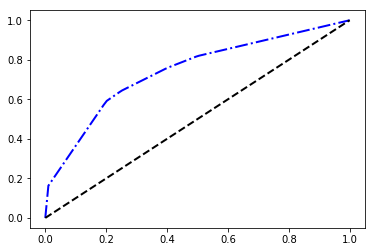

In [66]:
import matplotlib.pyplot as plt
from scipy import interp

# lets create a cross-fold validator
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True)

X=tfidf_counts_train_statement.toarray()
print(X)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, Y)
model = SelectFromModel(clf, prefit=True)
X = model.transform(X)
print(X.shape)


from sklearn.metrics import accuracy_score,\
    confusion_matrix,\
    roc_auc_score,\
    average_precision_score,\
    f1_score,\
    matthews_corrcoef
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn import metrics
import matplotlib
from sklearn.metrics import roc_curve, auc
from scipy import interp
    
Accuray = []
auROC = []
avePrecision = []
F1_Score = []
AUC = []
MCC = []
CM = np.array([
    [0, 0],
    [0, 0],
], dtype=int)

lw=2


mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in cv.split(X, Y):

    X_train = X[train_index]
    X_test = X[test_index]

    y_train = Y[train_index]
    y_test = Y[test_index]

    #model = svm.SVC(gamma=0.001, C=100.,probability=True)
    #model = RandomForestClassifier(n_estimators=100)
    #from sklearn.tree import DecisionTreeClassifier
    #model = AdaBoostClassifier(n_estimators=100,base_estimator=DecisionTreeClassifier(max_depth=50))
    from sklearn.neighbors import  KNeighborsClassifier
    #model = KNeighborsClassifier()
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import GradientBoostingClassifier
    model=GaussianNB()
# #     model = GradientBoostingClassifier(learning_rate=0.75, n_estimators=250,max_depth=50)
#     from sklearn.svm import SVC
#     model = SVC(C=1.0, kernel='poly', degree=5, gamma=0.01,random_state= 42)
    
    model.fit(X_train, y_train)

    yHat= model.predict(X_test) # predicted labels

    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    Accuray.append(accuracy_score(y_pred=yHat, y_true=y_test))
    auROC.append(roc_auc_score(y_test, y_proba))
    avePrecision.append(average_precision_score(y_test, y_proba))  # auPR
    F1_Score.append(f1_score(y_true=y_test, y_pred=yHat))
    MCC.append(matthews_corrcoef(y_true=y_test, y_pred=yHat))

    CM += confusion_matrix(y_pred=yHat, y_true=y_test)

print('Accuracy: {:.4f} ({:0.2f}%)'.format(np.mean(Accuray), np.mean(Accuray)*100.0))
print('auROC: {0:.4f}'.format(np.mean(auROC)))
print('auPR: {0:.4f}'.format(np.mean(avePrecision))) # average_Precision
print('F1-score: {0:.4f}'.format(np.mean(F1_Score)))
print('MCC: {0:.4f}'.format(np.mean(MCC)))


mean_tpr /= cv.get_n_splits(X, Y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)


plt.plot(mean_fpr, mean_tpr, color='b', linestyle='-.',
             label='SVM linear kernel auROC= %0.2f' % mean_auc, lw=lw)
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',label='Random')



    

In [43]:
clf1= GaussianNB()
clf2= AdaBoostClassifier(random_state = 1)
clf3= MLPClassifier(random_state = 1)
# clf1.fit(X, Y)
# clf2.fit(X, Y)
# clf3.fit(X, Y)
labels = ['Gaussian NB', 'AdaBoost', 'MLP']
for clf, label in zip ([clf1,clf2,clf3], labels):
    scores = model_selection.cross_val_score(clf, X, Y, cv=10, scoring= 'accuracy')
    print(scores.mean(),label)

0.7378787878787879 Gaussian NB
0.47505050505050506 AdaBoost
0.7524242424242424 MLP


In [44]:
voting_clf_soft = VotingClassifier(estimators=[(labels[0] , clf1),
                                               (labels[1] , clf2),
                                               (labels[2] , clf3)], voting='soft')

In [45]:
labels_new = ['Gaussian NB', 'AdaBoost', 'MLP', 'Voting_Classifier_Soft']
for (clf, label) in zip ([clf1 , clf2 , clf3 , voting_clf_soft], labels_new):
    scores = model_selection.cross_val_score(clf, X, Y, cv=10, scoring= 'accuracy')
    print(scores.mean(), label)

0.7378787878787879 Gaussian NB
0.47505050505050506 AdaBoost
0.7524242424242424 MLP
0.746969696969697 Voting_Classifier_Soft
